In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

# 1 Loading Dataset

In [2]:
data=pd.read_csv("titanic_dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2 Making PassengerId as the indexx column

In [3]:
data=pd.read_csv("titanic_dataset.csv",index_col=("PassengerId"))
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3 Basic details of the Dataset

In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# 4 Filling Missing Values

In [6]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
data["Age"]=data["Age"].fillna(data['Age'].median())
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
mode = st.mode(data['Embarked'])
mode
data["Embarked"]=data["Embarked"].fillna(mode)
data['Cabin']=data['Cabin'].fillna('Unknown')
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5 Handling Outliers

Text(0.5, 1.0, 'Boxplot of Fare')

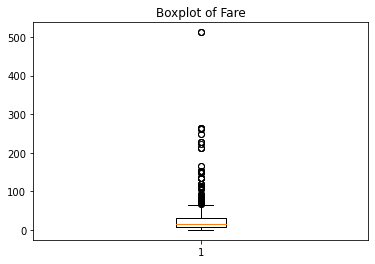

In [12]:
plt.boxplot(data["Fare"])
plt.title("Boxplot of Fare")

In [13]:
Q1=np.percentile(data["Fare"],25,interpolation="midpoint")
Q2=np.percentile(data["Fare"],50,interpolation="midpoint")
Q3=np.percentile(data["Fare"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [14]:
data["Fare"].median()

14.4542

In [15]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-26.724
65.6344


In [17]:
outlier=[]
for x in data["Fare"]:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [18]:
data1=data["Fare"]>up_lim
ind1=data.loc[data1].index
ind1

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [19]:
data.drop(ind1,inplace=True)

In [20]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q


Text(0.5, 1.0, 'Boxplot of Age')

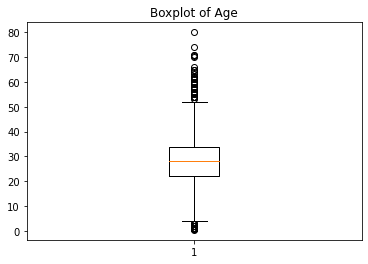

In [21]:
plt.boxplot(data["Age"])
plt.title("Boxplot of Age")

In [22]:
Q1=np.percentile(data["Age"],25,interpolation="midpoint")
Q2=np.percentile(data["Age"],50,interpolation="midpoint")
Q3=np.percentile(data["Age"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
34.0


In [23]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

4.0
52.0


In [24]:
outlier=[]
for x in data["Age"]:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier        

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

In [25]:
ind2=data['Age'][(data['Age']>up_lim)|(data['Age']<low_lim)].index
data.drop(ind2,inplace=True)

Text(0.5, 1.0, 'Boxplot of Age')

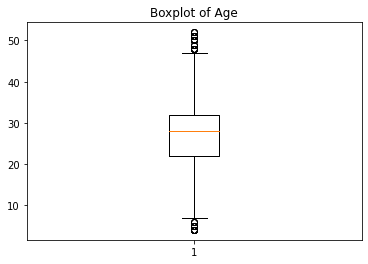

In [26]:
plt.boxplot(data["Age"])
plt.title("Boxplot of Age")

Text(0.5, 1.0, 'Boxplot of SibSp')

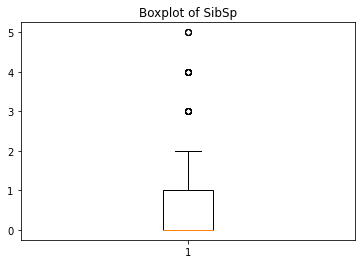

In [27]:
plt.boxplot(data["SibSp"])
plt.title("Boxplot of SibSp")

In [28]:
Q1=np.percentile(data["SibSp"],25,interpolation="midpoint")
Q2=np.percentile(data["SibSp"],50,interpolation="midpoint")
Q3=np.percentile(data["SibSp"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

0.0
0.0
1.0
-1.5
2.5


In [29]:
outlier=[]
for x in data["SibSp"]:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier   

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

In [30]:

ind3=data['SibSp'][(data['SibSp']>up_lim)|(data['SibSp']<low_lim)].index

In [31]:
data.drop(ind3,inplace=True)

Text(0.5, 1.0, 'Boxplot of SibSp')

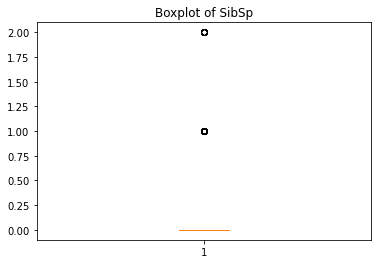

In [32]:
plt.boxplot(data["SibSp"])
plt.title("Boxplot of SibSp")

# 6 MinMax Scaling

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Name'] = le.fit_transform(data['Name'])
data['Ticket'] = le.fit_transform(data['Ticket'])
data['Cabin'] = le.fit_transform(data['Cabin'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Sex'] = le.fit_transform(data['Sex'])
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,76,1,22.0,1,0,462,7.2500,72,2
3,1,3,264,0,26.0,0,0,582,7.9250,72,2
4,1,1,204,0,35.0,1,0,34,53.1000,26,2
5,0,3,14,1,35.0,0,0,415,8.0500,72,2
6,0,3,429,1,28.0,0,0,230,8.4583,72,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,423,1,27.0,0,0,66,13.0000,72,2
888,1,1,226,0,19.0,0,0,10,30.0000,16,2
889,0,3,312,0,28.0,1,2,588,23.4500,72,2


In [34]:
y=data['Survived']
x=data.drop('Survived',axis=1)

In [35]:
from sklearn.preprocessing import MinMaxScaler
min = MinMaxScaler(feature_range=(0,1))
x = min.fit_transform(x)
x

array([[1.        , 0.11176471, 1.        , ..., 0.11153846, 1.        ,
        1.        ],
       [1.        , 0.38823529, 0.        , ..., 0.12192308, 1.        ,
        1.        ],
       [0.        , 0.3       , 0.        , ..., 0.81692308, 0.36111111,
        1.        ],
       ...,
       [1.        , 0.45882353, 0.        , ..., 0.36076923, 1.        ,
        1.        ],
       [0.        , 0.07941176, 1.        , ..., 0.46153846, 0.41666667,
        0.        ],
       [1.        , 0.24411765, 1.        , ..., 0.11923077, 1.        ,
        0.5       ]])